In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Specify the path to the CSV file
Processed_Dataset_path = 'datasets/Processed_Dataset.csv'


# Read the compressed CSV file using pandas
Processed_Dataset = pd.read_csv(Processed_Dataset_path)

In [4]:
Processed_Dataset["DateTime"]= pd.to_datetime(Processed_Dataset['timestamp'], unit='us')

In [5]:
print("Size of data",len(Processed_Dataset))
Processed_Dataset

Size of data 345600


,timestamp,exchange,symbol,DT_timestamp,BS5_timestamp,last_price,index_price,mark_price,asks[0].price,asks[0].amount,...,bids[2].amount,asks[3].price,asks[3].amount,bids[3].price,bids[3].amount,asks[4].price,asks[4].amount,bids[4].price,bids[4].amount,DateTime
0,1725148800000000,deribit,BTC-PERPETUAL,1725148800138000,1725148800151000,58971.0,58969.00,58970.45,58971.0,172780.0,...,10000.0,58975.5,35900.0,58964.5,10330.0,58976.0,1290.0,58963.0,1280.0,2024-09-01 00:00:00.000
1,1725148800250000,deribit,BTC-PERPETUAL,1725148800138000,1725148800151000,58971.0,58969.00,58970.45,58971.0,172780.0,...,10000.0,58975.5,35900.0,58964.5,10330.0,58976.0,1290.0,58963.0,1280.0,2024-09-01 00:00:00.250
2,1725148800500000,deribit,BTC-PERPETUAL,1725148800376000,1725148800622000,58971.0,58969.00,58970.44,58971.0,179840.0,...,10000.0,58975.5,35900.0,58964.5,10330.0,58976.0,1290.0,58963.0,1280.0,2024-09-01 00:00:00.500
3,1725148800750000,deribit,BTC-PERPETUAL,1725148800806000,1725148800810000,58971.0,58967.96,58969.40,58971.0,179840.0,...,10000.0,58975.5,35900.0,58964.5,10330.0,58976.0,1290.0,58963.0,31280.0,2024-09-01 00:00:00.750
4,1725148801000000,deribit,BTC-PERPETUAL,1725148800806000,1725148800948000,58971.0,58967.96,58969.40,58971.0,179840.0,...,10000.0,58975.5,35900.0,58965.5,30000.0,58976.0,1290.0,58965.0,101000.0,2024-09-01 00:00:01.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345595,1725235198750000,deribit,BTC-PERPETUAL,1725235198638000,1725235198638000,57298.0,57301.13,57289.99,57295.5,174070.0,...,50.0,57298.5,360.0,57285.0,8240.0,57299.0,9440.0,57284.5,280.0,2024-09-01 23:59:58.750
345596,1725235199000000,deribit,BTC-PERPETUAL,1725235199171000,1725235199007000,57298.0,57299.40,57288.26,57295.5,182310.0,...,50.0,57298.5,360.0,57284.0,9430.0,57299.0,8250.0,57283.5,2170.0,2024-09-01 23:59:59.000
345597,1725235199250000,deribit,BTC-PERPETUAL,1725235199171000,1725235199209000,57298.0,57299.40,57288.26,57295.5,182310.0,...,50.0,57298.5,360.0,57284.0,9430.0,57299.0,8250.0,57283.5,2170.0,2024-09-01 23:59:59.250
345598,1725235199500000,deribit,BTC-PERPETUAL,1725235199498000,1725235199500000,57295.0,57299.40,57288.26,57295.5,192560.0,...,11730.0,57299.5,8250.0,57280.5,1000.0,57300.0,280350.0,57279.5,30000.0,2024-09-01 23:59:59.500


In [6]:
Processed_Dataset["mark_price"][0]

np.float64(58970.45)

In [8]:
def generate_actual_label():
    Processed_Dataset['Price Movement'] = Processed_Dataset["mark_price"].diff().apply(lambda x: 'Up' if x > 0 else 'Down' if x < 0 else 'Stable')

In [9]:
generate_actual_label()

In [10]:
Processed_Dataset

,timestamp,exchange,symbol,DT_timestamp,BS5_timestamp,last_price,index_price,mark_price,asks[0].price,asks[0].amount,...,asks[3].price,asks[3].amount,bids[3].price,bids[3].amount,asks[4].price,asks[4].amount,bids[4].price,bids[4].amount,DateTime,Price Movement
0,1725148800000000,deribit,BTC-PERPETUAL,1725148800138000,1725148800151000,58971.0,58969.00,58970.45,58971.0,172780.0,...,58975.5,35900.0,58964.5,10330.0,58976.0,1290.0,58963.0,1280.0,2024-09-01 00:00:00.000,Stable
1,1725148800250000,deribit,BTC-PERPETUAL,1725148800138000,1725148800151000,58971.0,58969.00,58970.45,58971.0,172780.0,...,58975.5,35900.0,58964.5,10330.0,58976.0,1290.0,58963.0,1280.0,2024-09-01 00:00:00.250,Stable
2,1725148800500000,deribit,BTC-PERPETUAL,1725148800376000,1725148800622000,58971.0,58969.00,58970.44,58971.0,179840.0,...,58975.5,35900.0,58964.5,10330.0,58976.0,1290.0,58963.0,1280.0,2024-09-01 00:00:00.500,Down
3,1725148800750000,deribit,BTC-PERPETUAL,1725148800806000,1725148800810000,58971.0,58967.96,58969.40,58971.0,179840.0,...,58975.5,35900.0,58964.5,10330.0,58976.0,1290.0,58963.0,31280.0,2024-09-01 00:00:00.750,Down
4,1725148801000000,deribit,BTC-PERPETUAL,1725148800806000,1725148800948000,58971.0,58967.96,58969.40,58971.0,179840.0,...,58975.5,35900.0,58965.5,30000.0,58976.0,1290.0,58965.0,101000.0,2024-09-01 00:00:01.000,Stable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345595,1725235198750000,deribit,BTC-PERPETUAL,1725235198638000,1725235198638000,57298.0,57301.13,57289.99,57295.5,174070.0,...,57298.5,360.0,57285.0,8240.0,57299.0,9440.0,57284.5,280.0,2024-09-01 23:59:58.750,Stable
345596,1725235199000000,deribit,BTC-PERPETUAL,1725235199171000,1725235199007000,57298.0,57299.40,57288.26,57295.5,182310.0,...,57298.5,360.0,57284.0,9430.0,57299.0,8250.0,57283.5,2170.0,2024-09-01 23:59:59.000,Down
345597,1725235199250000,deribit,BTC-PERPETUAL,1725235199171000,1725235199209000,57298.0,57299.40,57288.26,57295.5,182310.0,...,57298.5,360.0,57284.0,9430.0,57299.0,8250.0,57283.5,2170.0,2024-09-01 23:59:59.250,Stable
345598,1725235199500000,deribit,BTC-PERPETUAL,1725235199498000,1725235199500000,57295.0,57299.40,57288.26,57295.5,192560.0,...,57299.5,8250.0,57280.5,1000.0,57300.0,280350.0,57279.5,30000.0,2024-09-01 23:59:59.500,Stable


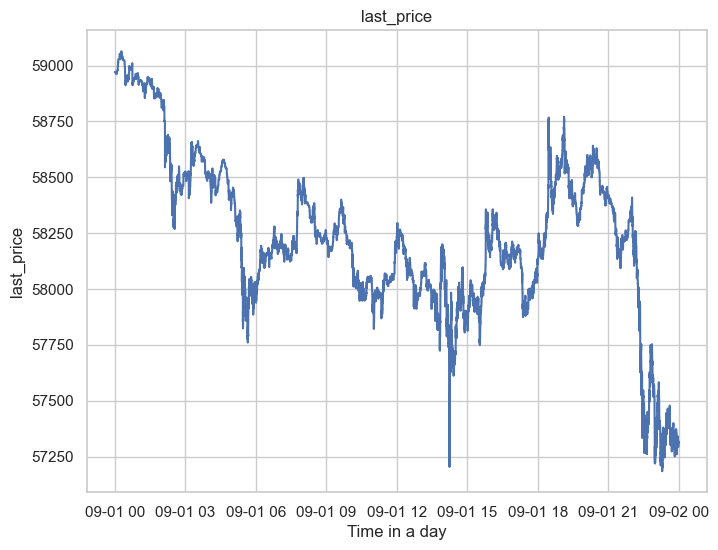

In [6]:
#Visualise the Last price

sns.set(style="whitegrid")  # Optional: Set the style
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

sns.lineplot(x='DateTime', y="last_price", data=Processed_Dataset)

# Add labels and title
plt.xlabel('Time in a day')
# plt.ylabel('Y-axis Label')
plt.title('last_price')

plt.show()

In [7]:
# Making copy for dataset and rename column name
Test_Dataset=Processed_Dataset.copy(deep=True)

In [8]:
# TODO: Filter Field

In [14]:
# TODO: Normalised asks & bids price 
Test_Dataset["Normalised_asks[0].price"]=(Test_Dataset["asks[0].price"]-Test_Dataset["last_price"])/Test_Dataset["last_price"]
Test_Dataset["Normalised_asks[1].price"]=(Test_Dataset["asks[1].price"]-Test_Dataset["last_price"])/Test_Dataset["last_price"]
Test_Dataset["Normalised_asks[2].price"]=(Test_Dataset["asks[2].price"]-Test_Dataset["last_price"])/Test_Dataset["last_price"]
Test_Dataset["Normalised_asks[3].price"]=(Test_Dataset["asks[3].price"]-Test_Dataset["last_price"])/Test_Dataset["last_price"]
Test_Dataset["Normalised_asks[4].price"]=(Test_Dataset["asks[4].price"]-Test_Dataset["last_price"])/Test_Dataset["last_price"]

Test_Dataset["Normalised_bids[0].price"]=(Test_Dataset["bids[0].price"]-Test_Dataset["last_price"])/Test_Dataset["last_price"]
Test_Dataset["Normalised_bids[1].price"]=(Test_Dataset["bids[1].price"]-Test_Dataset["last_price"])/Test_Dataset["last_price"]
Test_Dataset["Normalised_bids[2].price"]=(Test_Dataset["bids[2].price"]-Test_Dataset["last_price"])/Test_Dataset["last_price"]
Test_Dataset["Normalised_bids[3].price"]=(Test_Dataset["bids[3].price"]-Test_Dataset["last_price"])/Test_Dataset["last_price"]
Test_Dataset["Normalised_bids[4].price"]=(Test_Dataset["bids[4].price"]-Test_Dataset["last_price"])/Test_Dataset["last_price"]


In [18]:
# TODO: Normalised last price
# mean_last = Test_Dataset['last_price'].mean()
# std_last = Test_Dataset['last_price'].std()
# Test_Dataset['last_price_zscore'] = (Test_Dataset['last_price'] - mean_last) / std_last


In [17]:
Test_Dataset

,timestamp,exchange,symbol,DT_timestamp,BS5_timestamp,last_price,index_price,mark_price,asks[0].price,asks[0].amount,...,Normalised_asks[1].price,Normalised_asks[2].price,Normalised_asks[3].price,Normalised_asks[4].price,Normalised_bids[0].price,Normalised_bids[1].price,Normalised_bids[2].price,Normalised_bids[3].price,Normalised_bids[4].price,last_price_zscore
0,1725148800000000,deribit,BTC-PERPETUAL,1725148800138000,1725148800151000,58971.0,58969.00,58970.45,58971.0,172780.0,...,0.000025,0.000068,0.000076,0.000085,-0.000008,-0.000059,-0.000068,-0.000110,-0.000136,2.038244
1,1725148800250000,deribit,BTC-PERPETUAL,1725148800138000,1725148800151000,58971.0,58969.00,58970.45,58971.0,172780.0,...,0.000025,0.000068,0.000076,0.000085,-0.000008,-0.000059,-0.000068,-0.000110,-0.000136,2.038244
2,1725148800500000,deribit,BTC-PERPETUAL,1725148800376000,1725148800622000,58971.0,58969.00,58970.44,58971.0,179840.0,...,0.000025,0.000068,0.000076,0.000085,-0.000008,-0.000059,-0.000068,-0.000110,-0.000136,2.038244
3,1725148800750000,deribit,BTC-PERPETUAL,1725148800806000,1725148800810000,58971.0,58967.96,58969.40,58971.0,179840.0,...,0.000025,0.000068,0.000076,0.000085,-0.000008,-0.000059,-0.000068,-0.000110,-0.000136,2.038244
4,1725148801000000,deribit,BTC-PERPETUAL,1725148800806000,1725148800948000,58971.0,58967.96,58969.40,58971.0,179840.0,...,0.000025,0.000068,0.000076,0.000085,-0.000008,-0.000059,-0.000068,-0.000093,-0.000102,2.038244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345595,1725235198750000,deribit,BTC-PERPETUAL,1725235198638000,1725235198638000,57298.0,57301.13,57289.99,57295.5,174070.0,...,-0.000035,0.000000,0.000009,0.000017,-0.000052,-0.000148,-0.000157,-0.000227,-0.000236,-2.555860
345596,1725235199000000,deribit,BTC-PERPETUAL,1725235199171000,1725235199007000,57298.0,57299.40,57288.26,57295.5,182310.0,...,-0.000035,0.000000,0.000009,0.000017,-0.000052,-0.000148,-0.000157,-0.000244,-0.000253,-2.555860
345597,1725235199250000,deribit,BTC-PERPETUAL,1725235199171000,1725235199209000,57298.0,57299.40,57288.26,57295.5,182310.0,...,-0.000035,0.000000,0.000009,0.000017,-0.000052,-0.000148,-0.000157,-0.000244,-0.000253,-2.555860
345598,1725235199500000,deribit,BTC-PERPETUAL,1725235199498000,1725235199500000,57295.0,57299.40,57288.26,57295.5,192560.0,...,0.000017,0.000061,0.000079,0.000087,-0.000105,-0.000201,-0.000227,-0.000253,-0.000271,-2.564098
